## Install MySQL support

- Anaconda on MS Windows: conda install mysql-connector-python
- Otherwise: `pip install mysql-connector`

In [ ]:
# pip install mysql-connector-python

- We use the classicmodels database as a MySQL sample database to help you work with MySQL quickly and effectively. 
- The classicmodels database is a retailer of scale models of classic cars database.
-  It contains typical business data such as customers, products, sales orders, sales order line items, etc.

> Download the full database from here: 
>
> https://www.mysqltutorial.org/mysql-sample-database.aspx

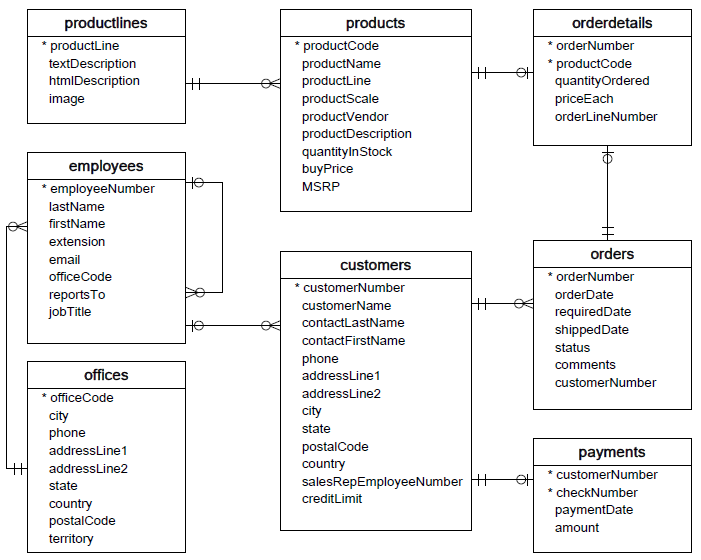

## Connect to MySQL and Handle exception

In [51]:
import mysql.connector

def get_connection():
    try:
        conn = mysql.connector.connect(
            host = 'localhost',
            database = 'classicmodels',
            user = 'ali',
            password='ali123')
        print("Connected:", conn)
        return conn
    except mysql.connector.Error as e:
        print("MySQL exception: ", e)
    except Exception as e:
        print("Other exception", e);
    return None


## Select data

In [29]:
conn = get_connection()
cursor = conn.cursor()
cursor.execute("SELECT * from employees")
row = cursor.fetchone()
print(row)
cursor.fetchall()
cursor.close()
conn.close()

(1002, 'Murphy', 'Diane', 'x5800', 'dmurphy@classicmodelcars.com', '1', None, 'President')


True

## Select more data

In [53]:
conn = get_connection()
cursor = conn.cursor()
cursor.execute("SELECT * FROM employees")

while True:
    row = cursor.fetchone()
    if not row:
        break
    print(row)
cursor.close()
conn.close()

Connected: <mysql.connector.connection.MySQLConnection object at 0x7fbdc202aa60>
(1002, 'Murphy', 'Diane', 'x5800', 'dmurphy@classicmodelcars.com', '1', None, 'President')
(1056, 'Patterson', 'Mary', 'x4611', 'mpatterso@classicmodelcars.com', '1', 1002, 'VP Sales')
(1076, 'Firrelli', 'Jeff', 'x9273', 'jfirrelli@classicmodelcars.com', '1', 1002, 'VP Marketing')
(1088, 'Patterson', 'William', 'x4871', 'wpatterson@classicmodelcars.com', '6', 1056, 'Sales Manager (APAC)')
(1102, 'Bondur', 'Gerard', 'x5408', 'gbondur@classicmodelcars.com', '4', 1056, 'Sale Manager (EMEA)')
(1143, 'Bow', 'Anthony', 'x5428', 'abow@classicmodelcars.com', '1', 1056, 'Sales Manager (NA)')
(1165, 'Jennings', 'Leslie', 'x3291', 'ljennings@classicmodelcars.com', '1', 1143, 'Sales Rep')
(1166, 'Thompson', 'Leslie', 'x4065', 'lthompson@classicmodelcars.com', '1', 1143, 'Sales Rep')
(1188, 'Firrelli', 'Julie', 'x2173', 'jfirrelli@classicmodelcars.com', '2', 1143, 'Sales Rep')
(1216, 'Patterson', 'Steve', 'x4334', 'spa

## Select all data fetchall

In [ ]:
conn = get_connection()

cursor = conn.cursor()
cursor.execute("SELECT * FROM employees")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

## Select some data fetchmany

In [ ]:
conn = get_connection()

cursor = conn.cursor()
cursor.execute("SELECT * FROM employees")

size = 2

while True:
    rows = cursor.fetchmany(size)
    if not rows:
        break
    print(len(rows))
    for row in rows:
        print(row)

cursor.close()
conn.close()

## Select some data WHERE clause

In [55]:
conn = get_connection()

cursor = conn.cursor()
cursor.execute(f"SELECT * FROM employees WHERE officeCode = 6")

size = 2

while True:
    rows = cursor.fetchmany(size)
    if not rows:
        break
    print(len(rows))
    for row in rows:
        print(row)

cursor.close()
conn.close()

Connected: <mysql.connector.connection.MySQLConnection object at 0x7fbdd116dee0>
2
(1088, 'Patterson', 'William', 'x4871', 'wpatterson@classicmodelcars.com', '6', 1056, 'Sales Manager (APAC)')
(1611, 'Fixter', 'Andy', 'x101', 'afixter@classicmodelcars.com', '6', 1088, 'Sales Rep')
2
(1612, 'Marsh', 'Peter', 'x102', 'pmarsh@classicmodelcars.com', '6', 1088, 'Sales Rep')
(1619, 'King', 'Tom', 'x103', 'tking@classicmodelcars.com', '6', 1088, 'Sales Rep')


## Select into dictionaries

In [56]:
conn = get_connection()

cursor = conn.cursor(dictionary=True)
cursor.execute("SELECT * FROM employees WHERE officeCode = 6")

for row in cursor:
    print(row)

cursor.close()
conn.close()

Connected: <mysql.connector.connection.MySQLConnection object at 0x7fbdd116dc40>
{'employeeNumber': 1088, 'lastName': 'Patterson', 'firstName': 'William', 'extension': 'x4871', 'email': 'wpatterson@classicmodelcars.com', 'officeCode': '6', 'reportsTo': 1056, 'jobTitle': 'Sales Manager (APAC)'}
{'employeeNumber': 1611, 'lastName': 'Fixter', 'firstName': 'Andy', 'extension': 'x101', 'email': 'afixter@classicmodelcars.com', 'officeCode': '6', 'reportsTo': 1088, 'jobTitle': 'Sales Rep'}
{'employeeNumber': 1612, 'lastName': 'Marsh', 'firstName': 'Peter', 'extension': 'x102', 'email': 'pmarsh@classicmodelcars.com', 'officeCode': '6', 'reportsTo': 1088, 'jobTitle': 'Sales Rep'}
{'employeeNumber': 1619, 'lastName': 'King', 'firstName': 'Tom', 'extension': 'x103', 'email': 'tking@classicmodelcars.com', 'officeCode': '6', 'reportsTo': 1088, 'jobTitle': 'Sales Rep'}


## Insert data

In [60]:
def insert_data(name,birthdate,score):
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute(
        "INSERT INTO person (name, birthdate, score) VALUES (%s, %s, %s)",
        (name, birthdate, score))

    if cursor.lastrowid:
        print('last insert id', cursor.lastrowid)
    else:
        print('last insert id not found')
    conn.commit()
    conn.close()
insert_data('Monty Python2', '1999-10-05', 100)

Connected: <mysql.connector.connection.MySQLConnection object at 0x7fbdc202a280>
last insert id 4


## Update data

In [63]:
conn = get_connection()
cursor = conn.cursor()
pid = 4
score = 999
cursor.execute(f"UPDATE person SET score={score} WHERE id={pid}")
conn.commit()
conn.close()

Connected: <mysql.connector.connection.MySQLConnection object at 0x7fbdd15ddca0>


## Delete data

In [65]:
conn = get_connection()

cursor = conn.cursor()
cursor.execute(f"DELETE FROM person WHERE id=4")
conn.commit()
conn.close()

Connected: <mysql.connector.connection.MySQLConnection object at 0x7fbdd15dd0d0>
